α(deg)	Normal	Shear	S.F.(N)	S.F.(S)	S.F.(overall)
5	0.007	0.085	169.64	17.67	17.67
10	0.029	0.167	42.74	8.97	8.97
15	0.065	0.244	19.24	6.14	6.14
20	0.114	0.314	11.02	4.77	4.77
25	0.175	0.375	7.21	4.01	4.01
30	0.244	0.423	5.15	3.54	3.54
35	0.322	0.459	3.92	3.27	3.27
40	0.404	0.481	3.12	3.12	3.12
45	0.489	0.489	2.58	3.07	2.58
50	0.574	0.481	2.20	3.12	2.20
55	0.656	0.459	1.92	3.27	1.92
60	0.733	0.423	1.72	3.54	1.72
65	0.803	0.375	1.57	4.01	1.57
70	0.863	0.314	1.46	4.77	1.46
75	0.912	0.244	1.38	6.14	1.38
80	0.948	0.167	1.33	8.97	1.33
85	0.970	0.085	1.30	17.67	1.30


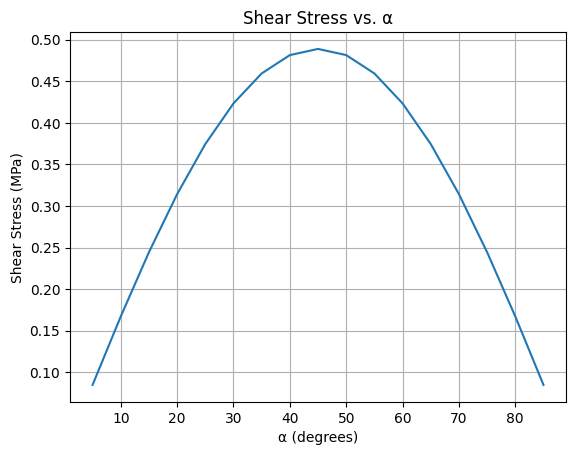

α(deg)	Normal	Shear	S.F.(N)	S.F.(S)	S.F.(overall)
5	0.71	8.10	211.57	26.41	26.41
10	2.81	15.96	53.30	13.41	13.41
15	6.25	23.33	23.99	9.17	9.17
20	10.92	30.00	13.74	7.13	7.13
25	16.67	35.75	9.00	5.99	5.99
30	23.33	40.41	6.43	5.30	5.30
35	30.71	43.85	4.89	4.88	4.88
40	38.56	45.96	3.89	4.66	3.89
45	46.67	46.67	3.21	4.59	3.21
50	54.77	45.96	2.74	4.66	2.74
55	62.63	43.85	2.40	4.88	2.40
60	70.00	40.41	2.14	5.30	2.14
65	76.66	35.75	1.96	5.99	1.96
70	82.42	30.00	1.82	7.13	1.82
75	87.08	23.33	1.72	9.17	1.72
80	90.52	15.96	1.66	13.41	1.66
85	92.62	8.10	1.62	26.41	1.62


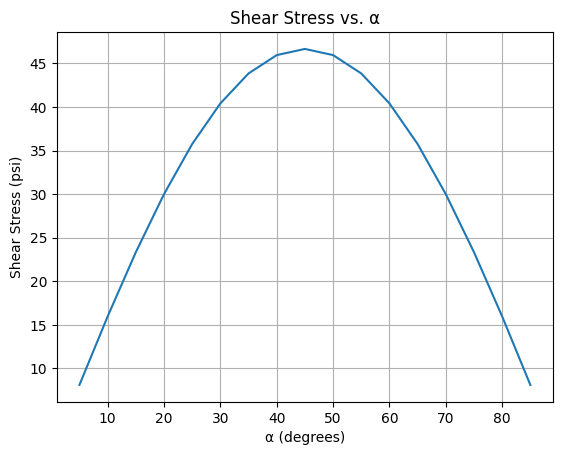

In [2]:
# import necessary packages
import math
import numpy as np
import matplotlib.pyplot as plt

# helper function to calculate the required values
def calculate_stresses(a, b, P, ult_normal, ult_shear, units):
    if units == 'SI':
        calculated_values = []
        shear_stresses = []
        alphas = np.arange(5, 90, 5)  # alpha values from 5 to 85 degrees
        for alpha in alphas:
            rad = math.radians(alpha)
            normal_stress = (P * (math.sin(rad)**2)) / (a * b)
            shear_stress = (P * math.sin(rad) * math.cos(rad)) / (a * b)
            sf_normal = ult_normal / normal_stress
            sf_shear = ult_shear / shear_stress
            sf_overall = min(sf_normal, sf_shear)
            calculated_values.append((alpha, normal_stress / 1000000, shear_stress / 1000000, sf_normal, sf_shear, sf_overall))
            shear_stresses.append(shear_stress / 1000000)
        return calculated_values, alphas, shear_stresses
    elif units == 'US':
        calculated_values = []
        shear_stresses = []
        alphas = np.arange(5, 90, 5)  # alpha values from 5 to 85 degrees
        for alpha in alphas:
            rad = math.radians(alpha)
            normal_stress = (P * (math.sin(rad)**2)) / (a * b)
            shear_stress = (P * math.sin(rad) * math.cos(rad)) / (a * b)
            sf_normal = ult_normal / normal_stress
            sf_shear = ult_shear / shear_stress
            sf_overall = min(sf_normal, sf_shear)
            calculated_values.append((alpha, normal_stress, shear_stress, sf_normal, sf_shear, sf_overall))
            shear_stresses.append(shear_stress)
        return calculated_values, alphas, shear_stresses

# helper function to print the results
def print_results(calculated_values, units):
    if units == 'SI':
        print("α(deg)\tNormal\tShear\tS.F.(N)\tS.F.(S)\tS.F.(overall)")
        for value in calculated_values:
            print("{:.0f}\t{:.3f}\t{:.3f}\t{:.2f}\t{:.2f}\t{:.2f}".format(value[0], value[1], value[2], value[3], value[4], value[5]))
    elif units == 'US':
        print("α(deg)\tNormal\tShear\tS.F.(N)\tS.F.(S)\tS.F.(overall)")
        for value in calculated_values:
            print("{:.0f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(value[0], value[1], value[2], value[3], value[4], value[5]))

# helper function to plot the shear stress vs alpha
def plot_shear_stress(alphas, shear_stresses, units):
    if units == 'SI':
        plt.plot(alphas, shear_stresses)
        plt.title('Shear Stress vs. α')
        plt.xlabel('α (degrees)')
        plt.ylabel('Shear Stress (MPa)')
        plt.grid(True)
        plt.show()
    elif units == 'US':
        plt.plot(alphas, shear_stresses)
        plt.title('Shear Stress vs. α')
        plt.xlabel('α (degrees)')
        plt.ylabel('Shear Stress (psi)')
        plt.grid(True)
        plt.show()

# Problem 1a
calculated_values, alphas, shear_stresses = calculate_stresses(.075, .150, 11000, 1260000, 1500000, 'SI') # generate values
print_results(calculated_values, 'SI')
plot_shear_stress(alphas, shear_stresses, 'SI')

# Problem 1b
calculated_values, alphas, shear_stresses = calculate_stresses(5, 3, 1400, 150, 214, 'US') # generate values
print_results(calculated_values, 'US')
plot_shear_stress(alphas, shear_stresses, 'US')
